In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
Transactions = pd.read_csv("Transactions.csv")

In [4]:
customers

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15
...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07
196,C0197,Christina Harvey,Europe,2023-03-21
197,C0198,Rebecca Ray,Europe,2022-02-27
198,C0199,Andrea Jenkins,Europe,2022-12-03


In [5]:
products

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31
...,...,...,...,...
95,P096,SoundWave Headphones,Electronics,307.47
96,P097,BookWorld Cookbook,Books,319.34
97,P098,SoundWave Laptop,Electronics,299.93
98,P099,SoundWave Mystery Book,Books,354.29


In [6]:
Transactions

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68
...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86


In [7]:
Transactions.ProductID.value_counts()

ProductID
P059    19
P029    17
P062    16
P079    16
P054    16
        ..
P024     5
P014     4
P031     4
P044     4
P099     4
Name: count, Length: 100, dtype: int64

In [8]:
Transactions.CustomerID.value_counts()

CustomerID
C0109    11
C0156    11
C0141    10
C0175    10
C0065    10
         ..
C0058     1
C0014     1
C0151     1
C0078     1
C0110     1
Name: count, Length: 199, dtype: int64

In [9]:
transactions_products = Transactions.merge(products, on='ProductID', how='left')
full_data = transactions_products.merge(customers, on='CustomerID', how='left')

In [16]:
# 1. Check for missing values
missing_values = full_data.isnull().sum()
print("Missing Values:\n", missing_values)

# 2. Summary statistics for numerical columns
numerical_summary = full_data.describe()
print("\nSummary Statistics:\n", numerical_summary)

# 3. Distribution of sales by region
sales_by_region = full_data.groupby('Region')['TotalValue'].sum()
print("\nSales by Region:\n", sales_by_region)

Missing Values:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price_x            0
ProductName        0
Category           0
Price_y            0
CustomerName       0
Region             0
SignupDate         0
dtype: int64

Summary Statistics:
           Quantity   TotalValue     Price_x     Price_y
count  1000.000000  1000.000000  1000.00000  1000.00000
mean      2.537000   689.995560   272.55407   272.55407
std       1.117981   493.144478   140.73639   140.73639
min       1.000000    16.080000    16.08000    16.08000
25%       2.000000   295.295000   147.95000   147.95000
50%       3.000000   588.880000   299.93000   299.93000
75%       4.000000  1011.660000   404.40000   404.40000
max       4.000000  1991.040000   497.76000   497.76000

Sales by Region:
 Region
Asia             152074.97
Europe           166254.63
North America    152313.40
South America    219352.56
Name: TotalValue, dtype: float64


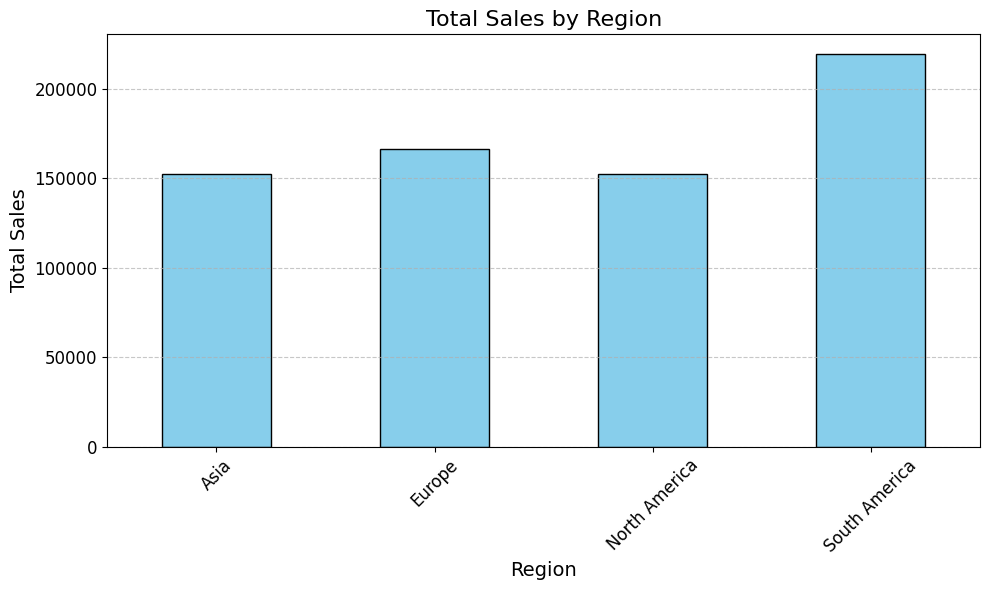

In [17]:
# Plot sales by region
plt.figure(figsize=(10, 6))
sales_by_region.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Total Sales by Region', fontsize=16)
plt.ylabel('Total Sales', fontsize=14)
plt.xlabel('Region', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Top-Selling Categories:
 Category
Books          681
Home Decor     639
Electronics    627
Clothing       590
Name: Quantity, dtype: int64


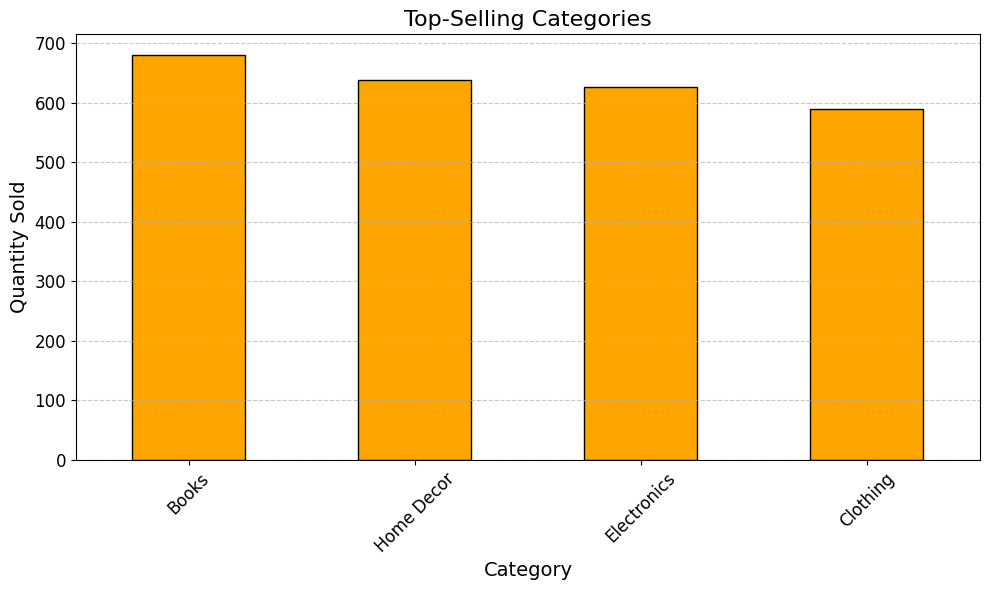

In [18]:
#Top-selling categories
top_categories = full_data.groupby('Category')['Quantity'].sum().sort_values(ascending=False)
print("\nTop-Selling Categories:\n", top_categories)

# Plot top-selling categories
plt.figure(figsize=(10, 6))
top_categories.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Top-Selling Categories', fontsize=16)
plt.ylabel('Quantity Sold', fontsize=14)
plt.xlabel('Category', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Top Customers by Spending:
 CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
C0188     7111.32
C0059     7073.28
C0028     6819.57
C0099     6715.72
C0165     6708.10
Name: TotalValue, dtype: float64


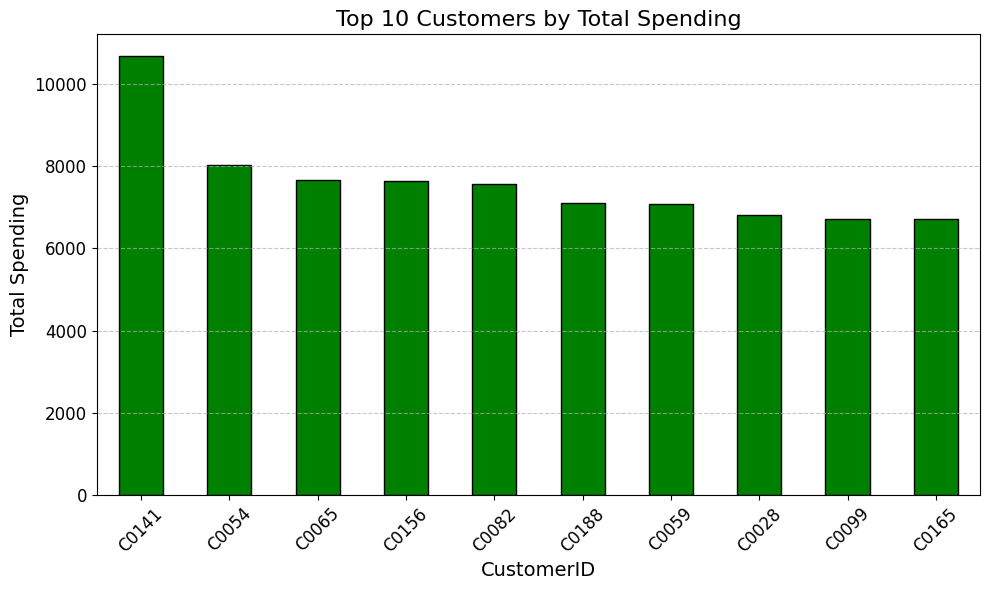

In [26]:
#Most loyal customers by total spending
top_customers = full_data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)
print("\nTop Customers by Spending:\n", top_customers)

# Plot top customers
plt.figure(figsize=(10, 6))
top_customers.plot(kind='bar', color='green', edgecolor='black')
plt.title('Top 10 Customers by Total Spending', fontsize=16)
plt.ylabel('Total Spending', fontsize=14)
plt.xlabel('CustomerID', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

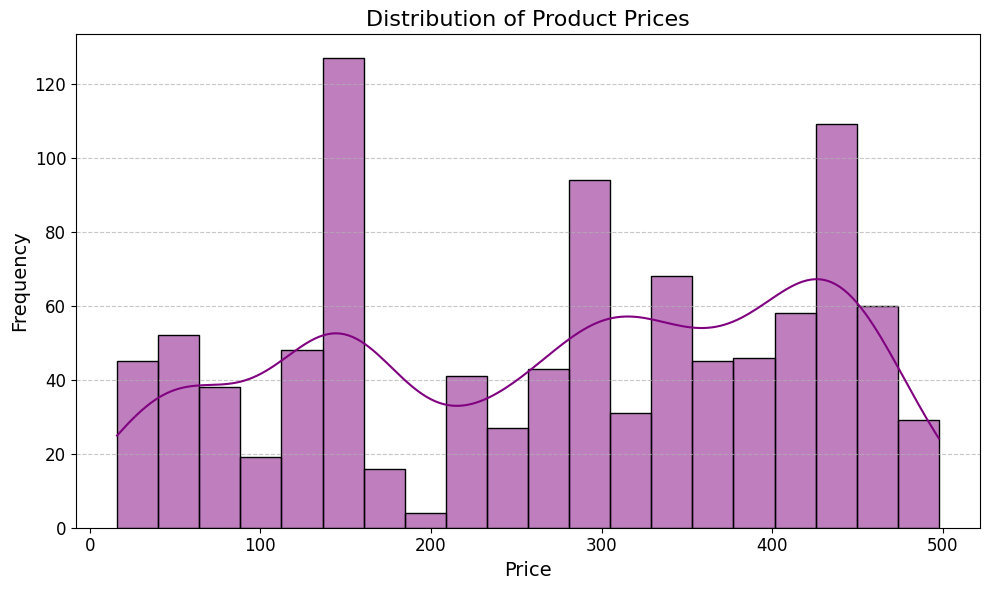

In [20]:
#Distribution of product prices
plt.figure(figsize=(10, 6))
sns.histplot(full_data['Price_x'], bins=20, kde=True, color='purple', edgecolor='black')
plt.title('Distribution of Product Prices', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

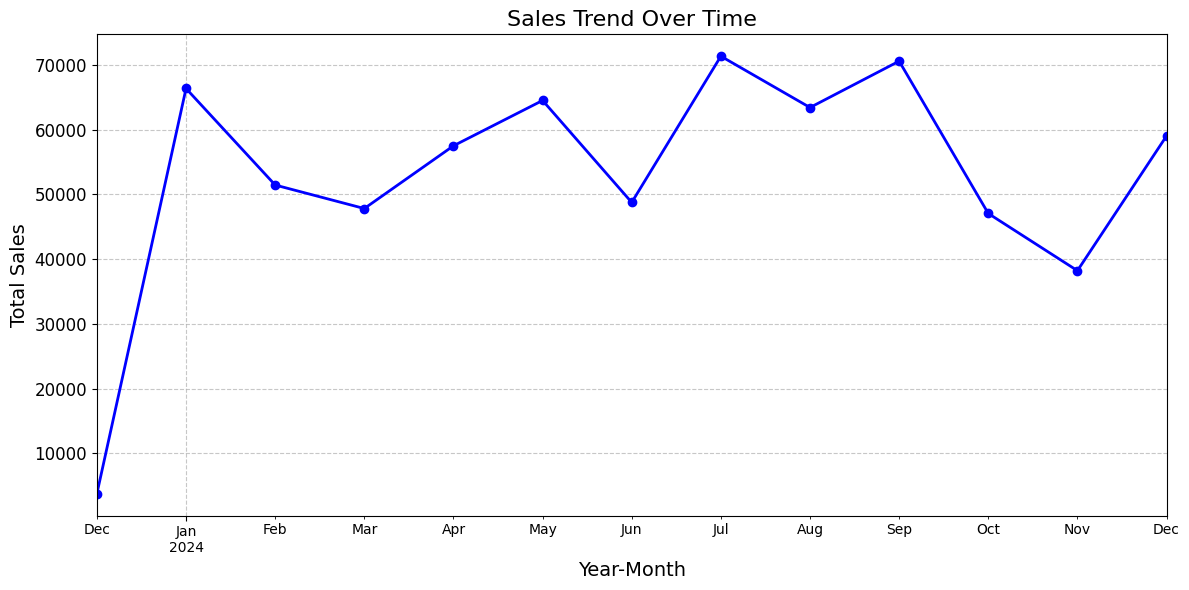

In [23]:
#Trends in transaction dates
full_data['TransactionDate'] = pd.to_datetime(full_data['TransactionDate'])
full_data['YearMonth'] = full_data['TransactionDate'].dt.to_period('M')
sales_trend = full_data.groupby('YearMonth')['TotalValue'].sum()

# Plot sales trend over time
plt.figure(figsize=(12, 6))
sales_trend.plot(kind='line', marker='o', color='blue', linestyle='-', linewidth=2)
plt.title('Sales Trend Over Time', fontsize=16)
plt.ylabel('Total Sales', fontsize=14)
plt.xlabel('Year-Month', fontsize=14)
plt.yticks(fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Average Spending by Region:
 Region
Asia             697.591606
Europe           710.489872
North America    624.235246
South America    721.554474
Name: TotalValue, dtype: float64


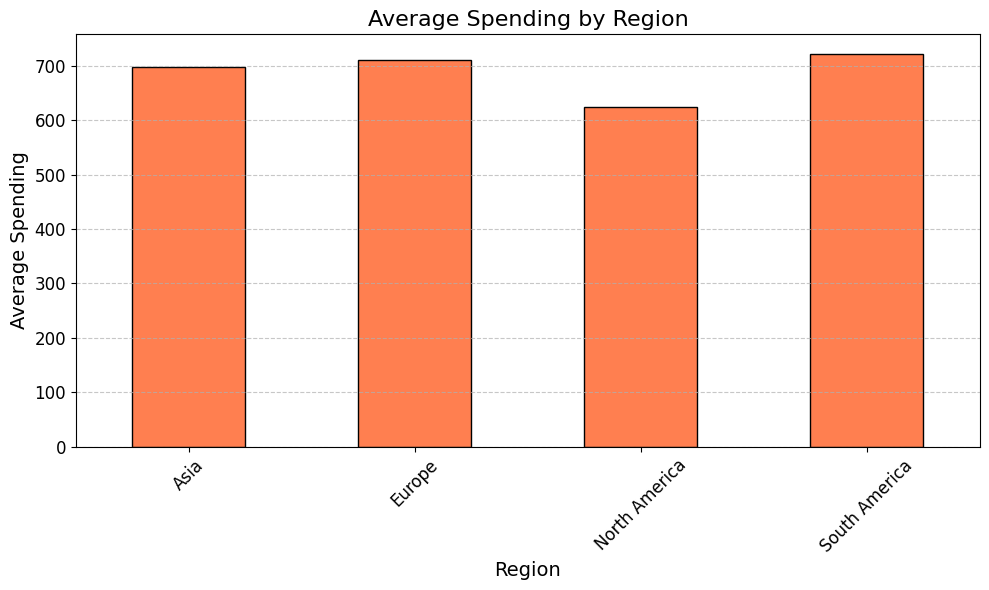

In [22]:
#Average spending by region
avg_spending_region = full_data.groupby('Region')['TotalValue'].mean()
print("\nAverage Spending by Region:\n", avg_spending_region)

# Plot average spending by region
plt.figure(figsize=(10, 6))
avg_spending_region.plot(kind='bar', color='coral', edgecolor='black')
plt.title('Average Spending by Region', fontsize=16)
plt.ylabel('Average Spending', fontsize=14)
plt.xlabel('Region', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
